IDC BREAST Classification



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.all import *


In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7ff776436ee0>, timeout=4)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

Path('/data/jayachs1/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

(#2) [Path('/data/jayachs1/.fastai/data/oxford-iiit-pet/images'),Path('/data/jayachs1/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img = '/data/jayachs1/IDC fastai/dataset_fastai'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

(#5) [Path('/data/jayachs1/IDC fastai/dataset_fastai/1/9322_idx5_x2951_y1451_class1.png'),Path('/data/jayachs1/IDC fastai/dataset_fastai/1/13401_idx5_x1351_y1251_class1.png'),Path('/data/jayachs1/IDC fastai/dataset_fastai/1/9259_idx5_x2551_y851_class1.png'),Path('/data/jayachs1/IDC fastai/dataset_fastai/1/10302_idx5_x1851_y1401_class1.png'),Path('/data/jayachs1/IDC fastai/dataset_fastai/1/16166_idx5_x2001_y1351_class1.png')]

Set the random seed to two to guarantee that the same validation set is every time. This will give you consistent results.

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
from fastai.vision import *
from fastai import *
from fastai.vision.data import ImageDataLoaders

#data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
#                                  ).normalize(imagenet_stats)
data = ImageDataLoaders.from_folder(path_img, train = ".", 
               valid_pct=0.2,  item_tfms=Resize(50), num_workers = 4)

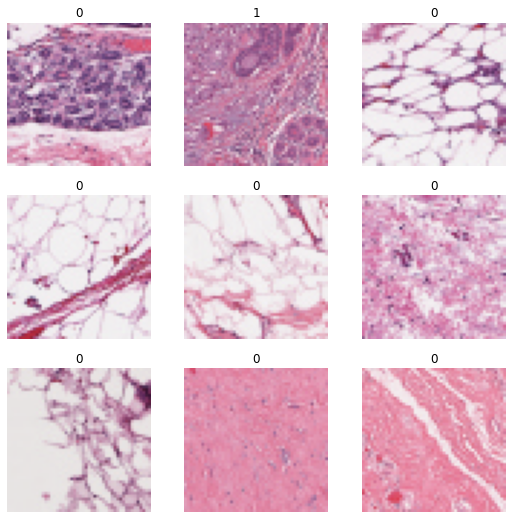

In [11]:
data.show_batch()


In [12]:
data.valid_ds.items[:3]


[Path('/data/jayachs1/IDC fastai/dataset_fastai/1/13403_idx5_x1351_y901_class1.png'),
 Path('/data/jayachs1/IDC fastai/dataset_fastai/0/13459_idx5_x551_y951_class0.png'),
 Path('/data/jayachs1/IDC fastai/dataset_fastai/1/13617_idx5_x1001_y251_class1.png')]

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier.We are building a model which will take images as input and will output the predicted probability for each of the categories.
We will train for 4 epochs (4 cycles through all our data).

In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    torch.device('cuda')
    print('gpu')
else:
    torch.device('cpu')
    print('cpu')

gpu


In [18]:
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.309670,0.290524,0.123991,03:32
1,0.288546,0.263430,0.110244,03:45
2,0.278746,0.257418,0.107524,03:43
3,0.257080,0.252405,0.105128,03:41


In [20]:
learn.save('stage-1')

Path('/data/jayachs1/IDC fastai/dataset_fastai/models/stage-1.pth')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

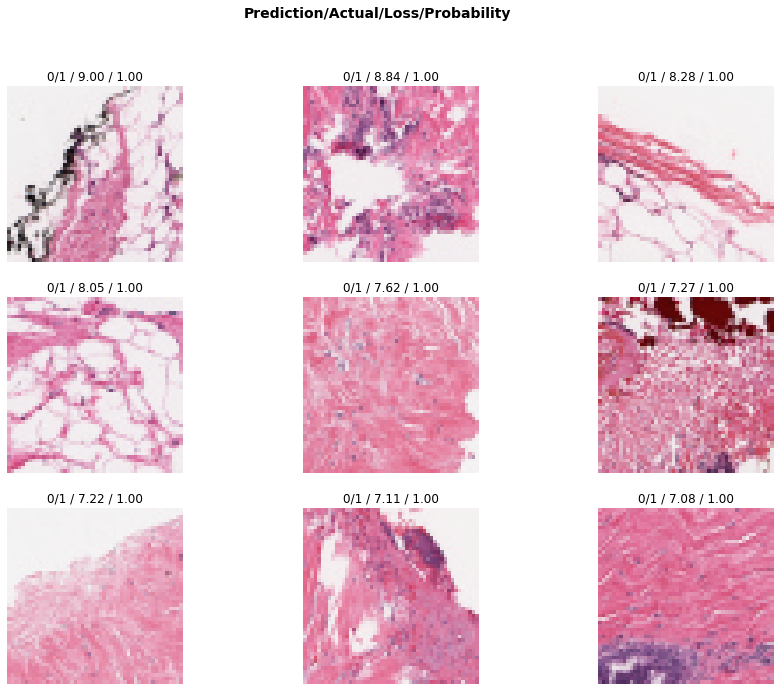

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
doc(interp.plot_top_losses)

Interpretation.plot_top_losses(k, largest=True, **kwargs)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


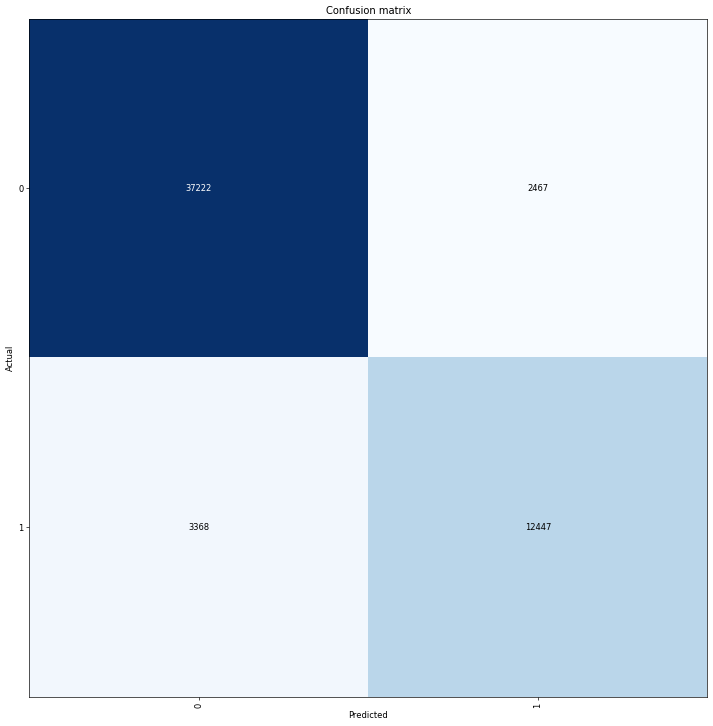

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('1', '0', 3368), ('0', '1', 2467)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.281118,0.262518,0.110334,04:21


In [28]:
learn.load('stage-1');

SuggestedLRs(valley=tensor(4.3652e-05))

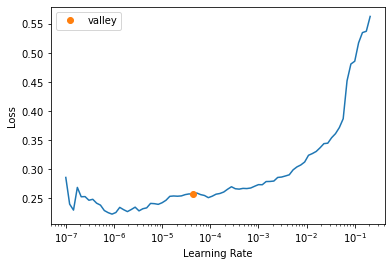

In [29]:
learn.lr_find()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.268622,0.249776,0.103434,04:24
1,0.229270,0.235605,0.097452,04:25


Model achieves 90.3% accuracy!